In [6]:
### Import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

In [7]:
### create dataframe1 for orders.csv file

df1 = pd.read_csv('orders.csv', header=0)
df1.info()
print(df1.head())
print(df1.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  


In [8]:
### sort values in ascending order with order_id and user_id

df1 = df1.sort_values(by=['order_id', 'user_id'], ascending=True)
print(df1.head())
print(df1.tail())

         order_id  user_id eval_set  order_number  order_dow  \
1868044         1   112108    train             4          4   
3355525         2   202279    prior             3          5   
3417191         3   205970    prior            16          5   
2958007         4   178520    prior            36          1   
2593373         5   156122    prior            42          6   

         order_hour_of_day  days_since_prior_order  
1868044                 10                     9.0  
3355525                  9                     8.0  
3417191                 17                    12.0  
2958007                  9                     7.0  
2593373                 16                     9.0  
         order_id  user_id eval_set  order_number  order_dow  \
1809968   3421079   108687    prior             6          1   
877324    3421080    52726    prior             2          1   
1949724   3421081   117076    prior             1          3   
2903252   3421082   175185    prior      

In [9]:
### create dataframe2 for order_products__prior.csv file

df2 = (pd.read_csv('order_products__prior.csv', header=0))
df2.info()
print(df2.head())
print(df2.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
          order_id  product_id  add_to_cart_order  reordered
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020       

In [10]:
### create dataframe3 for products.csv file

df3 = (pd.read_csv('products.csv', header=0))
df3.info()
print(df3.head())
print(df3.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
 

In [11]:
### create dataframe4 for aisles.csv file

df4 = (pd.read_csv('aisles.csv', header=0))
df4.info()
print(df4.head())
print(df4.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
     aisle_id                       aisle
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes


In [12]:
### create dataframe5 for departments.csv file

df5 = (pd.read_csv('departments.csv', header=0))
df5.info()
print(df5.head())
print(df5.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
    department_id department
16             17  household
17             18     babies
18             19     snacks
19             20       deli
20             21    missing


In [13]:
### merge df1 and df2 using common factor - order_id to create dataframe6

df1['order_id']=df1.order_id
df2['order_id']=df2.order_id
df6=pd.merge(df1,df2, on='order_id')

# df6.to_csv('mergedorderfiles.csv', index=False)

df6.info()
print(df6.head())
print(df6.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.7+ GB
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0         2   202279    prior             3          5                  9   
1         2   202279    prior             3          5                  9   
2         2   202279    prior             3          5                  9   
3         2   202279    prior             3          5                 

In [14]:
### drop eval_set col as we will not be using it
### eval_set : prior, train, test not needed
### new df6 created but we overwrite the old one created above

df6=df6.drop("eval_set", axis=1)

### rename days_since_prior_order to days_since_last_order
### more intuitive to understand

df6=df6.rename(columns={"days_since_prior_order":"days_since_last_order"})

print(df6.head())
print(df6.tail())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2   202279             3          5                  9   
1         2   202279             3          5                  9   
2         2   202279             3          5                  9   
3         2   202279             3          5                  9   
4         2   202279             3          5                  9   

   days_since_last_order  product_id  add_to_cart_order  reordered  
0                    8.0       33120                  1          1  
1                    8.0       28985                  2          1  
2                    8.0        9327                  3          0  
3                    8.0       45918                  4          1  
4                    8.0       30035                  5          0  
          order_id  user_id  order_number  order_dow  order_hour_of_day  \
32434484   3421083    25247            24          2                  6   
32434485   3421083    25247

In [15]:
### merge df3 and df4 using common factor - aisle_id to create dataframe7

df3['aisle_id']=df3.aisle_id
df4['aisle_id']=df4.aisle_id
df7=pd.merge(df3,df4, on='aisle_id')
df7.info()
print(df7.head())
print(df7.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB
   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle  
0             19  cookies cakes  
1             19  cook

In [16]:
### merge df7 and df5 using common factor - department_id to create dataframe

df7['department_id']=df7.department_id
df5['department_id']=df5.department_id
df8=pd.merge(df7,df5, on='department_id')
df8.info()
print(df8.head())
print(df8.tail())

## This outputs a .csv
# df8.to_csv('reference_file.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB
   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle department  
0 

In [20]:
### from pandas_profiling import ProfileReport

### profile = ProfileReport(df6)
### profile.to_file(output_file='df6_pandas_profile.html')

### DO NOT RUN. It takes very long. Not all computers have the ability to run it without crashing.

### SHOW HTML REPORT ###


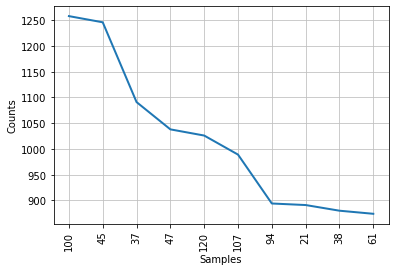

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
### Using nltk to check on the top 10 aisles

import nltk

input2 = df8['aisle_id']

entire_document_words = nltk.FreqDist(input2)
entire_document_words.plot(10,cumulative=False)

# Based on this NLP check (top 10 aisle), 
# we can see that there is a significant number of items that belong to aisle ID 100, aka "missing"
# We will need to investigate this further

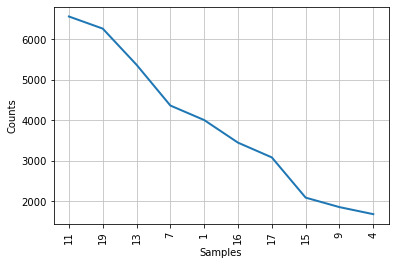

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
### Using nltk to check on the top 10 department

import nltk

input3 = df8['department_id']

entire_document_words = nltk.FreqDist(input3)
entire_document_words.plot(10,cumulative=False)


In [23]:
### We shall attempt to pull up all the items that belong to the "missing" aisles and departments
### Objective: to look at the items belonging to that category 
### and consider if we can reassign them to other categories

In [24]:
### Check if "Missing" comment in aisle_id 100 and department_id 21 matches
df8.loc[df8['aisle_id']==100]
# df8.loc[df8['department_id']==21]

,product_id,product_name,aisle_id,department_id,aisle,department
42813,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
42814,72,Organic Honeycrisp Apples,100,21,missing,missing
42815,110,Uncured Turkey Bologna,100,21,missing,missing
42816,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
42817,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
44066,49553,Organic Plain Skyr,100,21,missing,missing
44067,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
44068,49641,"8\"" Pecan Pie",100,21,missing,missing
44069,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [25]:
# df8.loc[df8['aisle_id']==100]
df8.loc[df8['department_id']==21]

# We realise it matches so aisle_id 100 is in department_id 21.

,product_id,product_name,aisle_id,department_id,aisle,department
42813,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
42814,72,Organic Honeycrisp Apples,100,21,missing,missing
42815,110,Uncured Turkey Bologna,100,21,missing,missing
42816,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
42817,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
44066,49553,Organic Plain Skyr,100,21,missing,missing
44067,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
44068,49641,"8\"" Pecan Pie",100,21,missing,missing
44069,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [26]:
### import pretty print so that the dictionary printout looks better
from pprint import pprint

In [27]:
### Create dictionary for {product_id:product_name}
product_dict = pd.Series(df8.product_name.values,index=df8.product_id).to_dict()

#### print(product_dict)
#### DO NOT print it! It's very long

In [28]:
### Create dictionary for {aisle_id:aisle}

aisle_dict = pd.Series(df8.aisle.values,index=df8.aisle_id).to_dict()
# def create_dict():
#     for k,v in df:
#         dictionary = dict(k,v)
pprint(aisle_dict)

{1: 'prepared soups salads',
 2: 'specialty cheeses',
 3: 'energy granola bars',
 4: 'instant foods',
 5: 'marinades meat preparation',
 6: 'other',
 7: 'packaged meat',
 8: 'bakery desserts',
 9: 'pasta sauce',
 10: 'kitchen supplies',
 11: 'cold flu allergy',
 12: 'fresh pasta',
 13: 'prepared meals',
 14: 'tofu meat alternatives',
 15: 'packaged seafood',
 16: 'fresh herbs',
 17: 'baking ingredients',
 18: 'bulk dried fruits vegetables',
 19: 'oils vinegars',
 20: 'oral hygiene',
 21: 'packaged cheese',
 22: 'hair care',
 23: 'popcorn jerky',
 24: 'fresh fruits',
 25: 'soap',
 26: 'coffee',
 27: 'beers coolers',
 28: 'red wines',
 29: 'honeys syrups nectars',
 30: 'latino foods',
 31: 'refrigerated',
 32: 'packaged produce',
 33: 'kosher foods',
 34: 'frozen meat seafood',
 35: 'poultry counter',
 36: 'butter',
 37: 'ice cream ice',
 38: 'frozen meals',
 39: 'seafood counter',
 40: 'dog food care',
 41: 'cat food care',
 42: 'frozen vegan vegetarian',
 43: 'buns rolls',
 44: 'eye ea

In [29]:
### Create dictionary for {department_id:department}

department_dict = pd.Series(df8.department.values,index=df8.department_id).to_dict()
# def create_dict():
#     for k,v in df:
#         dictionary = dict(k,v)
pprint(department_dict)

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}


In [30]:
### Check on df9 - aisle_id to department_id
### this is a file we created by manipulating in Excel
### We matched the aisles to their department and sorted them 
df9 = pd.read_csv('aisle_department.csv', header=0)
print(df9.head())

   aisle_id  department_id
0         1             20
1         2             16
2         3             19
3         4              9
4         5             13


In [34]:
### Create dictionary for {aisle_id: department_id} from df9
# #the key is aisle, the value is dept

# #this is function 4
def create_aisle_dept_dict():
    aisle_department_dict = pd.Series(df9.department_id.values,index=df9.aisle_id).to_dict()
    def create_dict():
        for k,v in df:
            dictionary = dict(k,v)
    return aisle_department_dict
pprint(create_aisle_dept_dict())

{1: 20,
 2: 16,
 3: 19,
 4: 9,
 5: 13,
 6: 2,
 7: 12,
 8: 3,
 9: 9,
 10: 17,
 11: 11,
 12: 9,
 13: 20,
 14: 20,
 15: 12,
 16: 4,
 17: 13,
 18: 10,
 19: 13,
 20: 11,
 21: 16,
 22: 11,
 23: 19,
 24: 4,
 25: 11,
 26: 7,
 27: 5,
 28: 5,
 29: 13,
 30: 6,
 31: 7,
 32: 4,
 33: 6,
 34: 1,
 35: 12,
 36: 16,
 37: 1,
 38: 1,
 39: 12,
 40: 8,
 41: 8,
 42: 1,
 43: 3,
 44: 11,
 45: 19,
 46: 19,
 47: 11,
 48: 14,
 49: 12,
 50: 19,
 51: 13,
 52: 1,
 53: 16,
 54: 17,
 55: 11,
 56: 18,
 57: 14,
 58: 1,
 59: 15,
 60: 17,
 61: 19,
 62: 5,
 63: 9,
 64: 7,
 65: 11,
 66: 6,
 67: 20,
 68: 10,
 69: 15,
 70: 11,
 71: 16,
 72: 13,
 73: 11,
 74: 17,
 75: 17,
 76: 6,
 77: 7,
 78: 19,
 79: 1,
 80: 11,
 81: 15,
 82: 18,
 83: 4,
 84: 16,
 85: 17,
 86: 16,
 87: 17,
 88: 13,
 89: 13,
 90: 7,
 91: 16,
 92: 18,
 93: 3,
 94: 7,
 95: 15,
 96: 20,
 97: 13,
 98: 7,
 99: 15,
 100: 21,
 101: 17,
 102: 18,
 103: 19,
 104: 13,
 105: 13,
 106: 12,
 107: 19,
 108: 16,
 109: 11,
 110: 13,
 111: 17,
 112: 3,
 113: 1,
 114: 17,
 115:

In [39]:
### Tried to recategorise the items with NLP/ML.
### However we were not able to come up with something satisfactory.

In [41]:
### Start of experiment 1###

import nltk
from nltk.corpus import wordnet
# nltk.download('brown')
from nltk.corpus import brown


your_tokens = nltk.word_tokenize('Organic Honeycrisp Apples')
print(your_tokens)
print('-----------------------------')

syns = {w : [] for w in your_tokens}

for k, v in syns.items():
    for synset in wordnet.synsets(k):
        for lemma in synset.lemmas():
            v.append(lemma.name())
print(syns)
print('-----------------------------')

text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('hello')


['Organic', 'Honeycrisp', 'Apples']
-----------------------------
{'Organic': ['organic', 'organic_fertilizer', 'organic_fertiliser', 'organic', 'organic', 'organic', 'organic', 'organic', 'constituent', 'constitutional', 'constitutive', 'organic'], 'Honeycrisp': [], 'Apples': ['apple', 'apple', 'orchard_apple_tree', 'Malus_pumila']}
-----------------------------
that something dear chantey


In [36]:
# df8 = pd.read_csv('reference_file.csv', header=0)
# df8.info()
# print(df8.head())
# print(df8.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB
   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle department  
0 

In [38]:
# # before change, checking on item we want to demo that code works (changing aisle based on input aisle ID)
# df8[df8['product_name'].str.contains('Dish Liquid')]

# ##we will take product_id 38 as sample 

,product_id,product_name,aisle_id,department_id,aisle,department
30026,1148,Oxy Power Degreaser Ultra Concentrated Dish Li...,74,17,dish detergents,household
30029,1336,Ultra Power Plus Natural Dish Liquid Fresh Scent,74,17,dish detergents,household
30030,1535,Oxy Plus Power Degreaser Concentrated Dish Liquid,74,17,dish detergents,household
30034,2581,Lavender Floral & Mint Natural Dish Liquid,74,17,dish detergents,household
30037,3070,Dish Liquid With Aloe,74,17,dish detergents,household
30045,4644,Passion Fruit and Plumeria Dish Liquid,74,17,dish detergents,household
30047,4789,Hand Moisturizing Dish Liquid,74,17,dish detergents,household
30057,6652,ECOS Dishmate Free & Clear Dish Liquid,74,17,dish detergents,household
30076,12448,Original Dish Liquid,74,17,dish detergents,household
30077,12510,Free & Clear Dish Liquid,74,17,dish detergents,household


In [42]:
# ## function 1 changes the data/columns

# ## function 2 pulls data from k/v pair in aisle dict, returns output 

# ## function 3 pulls data from k/v pair in dept dict, returns output 

## function 4 creates the aisle-department dict to relate the functions
## the aisle-department dict could have been created via the the df9 that we made using Excel
## but if we want to do it in Python we have a function below to do it

# #function 1 and 2 need to be related. 
# #function 2 and 3 need to be related
# # function 1 will take in an input target product ID that we want to change and target final_value for <1 key
# # e.g function 2 outputs key 1, the corresponding aisle is 'prepared soups salads'.
# # so function 1 will take in our own input product ID(int) and also the output key 1 from function 2

# ## given aisle_dict is the aisle dictionary
# #contains key (aisle_ID) and value (aisle)
# #let us make function 1 and 2 first

# #this is function 2, which accepts an input of an int value of aisle_id
# #it returns our desired aisle name which can be used to replace the number
# def pull_aisle_dict(id_request):
#     value = aisle_dict[id_request]
#     return value

# this is function 1
# def change_values(df,y,z):
#     # df is the input dataframe we want to edit
#     # x is the column we want to edit
#     # y is the product_id we input (to identify the specific row we want)
#     # z is the particular aisle we want to change
    
#     df.loc[df.product_id == y, 'aisle_id'] = z
#     df.loc[df.product_id == y, 'aisle'] = pull_aisle_dict(z)
#     return None

# change_values(df8,38,74)

In [40]:
# #Check that product_id 38's aisle_id and aisle are changed to: 74, 'dish detergents'
# df8[df8['product_name'].str.contains('Dish Liquid')]

,product_id,product_name,aisle_id,department_id,aisle,department
30026,1148,Oxy Power Degreaser Ultra Concentrated Dish Li...,74,17,dish detergents,household
30029,1336,Ultra Power Plus Natural Dish Liquid Fresh Scent,74,17,dish detergents,household
30030,1535,Oxy Plus Power Degreaser Concentrated Dish Liquid,74,17,dish detergents,household
30034,2581,Lavender Floral & Mint Natural Dish Liquid,74,17,dish detergents,household
30037,3070,Dish Liquid With Aloe,74,17,dish detergents,household
30045,4644,Passion Fruit and Plumeria Dish Liquid,74,17,dish detergents,household
30047,4789,Hand Moisturizing Dish Liquid,74,17,dish detergents,household
30057,6652,ECOS Dishmate Free & Clear Dish Liquid,74,17,dish detergents,household
30076,12448,Original Dish Liquid,74,17,dish detergents,household
30077,12510,Free & Clear Dish Liquid,74,17,dish detergents,household


In [41]:
# # now we test on product_id 11825
# change_values(df8,11825,74)

In [42]:
# df8[df8['product_name'].str.contains('Dish Liquid')]

,product_id,product_name,aisle_id,department_id,aisle,department
30026,1148,Oxy Power Degreaser Ultra Concentrated Dish Li...,74,17,dish detergents,household
30029,1336,Ultra Power Plus Natural Dish Liquid Fresh Scent,74,17,dish detergents,household
30030,1535,Oxy Plus Power Degreaser Concentrated Dish Liquid,74,17,dish detergents,household
30034,2581,Lavender Floral & Mint Natural Dish Liquid,74,17,dish detergents,household
30037,3070,Dish Liquid With Aloe,74,17,dish detergents,household
30045,4644,Passion Fruit and Plumeria Dish Liquid,74,17,dish detergents,household
30047,4789,Hand Moisturizing Dish Liquid,74,17,dish detergents,household
30057,6652,ECOS Dishmate Free & Clear Dish Liquid,74,17,dish detergents,household
30076,12448,Original Dish Liquid,74,17,dish detergents,household
30077,12510,Free & Clear Dish Liquid,74,17,dish detergents,household


In [43]:
# ## create function to pull department_id and aisle_id together into a dictionary (Function4)

# #test_zip_dict = None

# # for aisle_id,dept_id in df6.aisle_id,df6.department_id:
# #     None

# # for dept_id in df6.department_id:
# #     None

# #the key is aisle, the value is dept


# #this is function 4 

# def create_aisle_dept_dict():
#     def create_aisle_list():
#         aisle_list = []
#         for aisle_id in df8.aisle_id:
#             aisle_list.append(aisle_id)
#         #print(aisle_list)
#         return aisle_list

#     def create_dept_list():
#         department_list = []
#         for dept_id in df8.department_id:
#             #print(dept_id)
#             department_list.append(dept_id)
#         #print(dept_list)
#         return department_list
#     def aisle_dept_dict():
#         # print(create_aisle_list())
#         # print(create_dept_list())
#         test_zip_dict = dict(zip(create_aisle_list(),create_dept_list()))
#         print(test_zip_dict)
#         return test_zip_dict
#     aisle_dept_dict()
    
# # Run the function 4 to create dictionary of aisle_id - department_id link
# create_aisle_dept_dict()

{61: 19, 103: 19, 3: 19, 107: 19, 78: 19, 23: 19, 50: 19, 45: 19, 46: 19, 117: 19, 125: 19, 104: 13, 5: 13, 105: 13, 89: 13, 88: 13, 19: 13, 97: 13, 51: 13, 29: 13, 17: 13, 72: 13, 110: 13, 94: 7, 98: 7, 115: 7, 31: 7, 64: 7, 26: 7, 77: 7, 90: 7, 38: 1, 116: 1, 119: 1, 79: 1, 58: 1, 34: 1, 37: 1, 129: 1, 52: 1, 42: 1, 113: 1, 11: 11, 20: 11, 47: 11, 127: 11, 22: 11, 65: 11, 70: 11, 118: 11, 109: 11, 132: 11, 25: 11, 73: 11, 126: 11, 44: 11, 80: 11, 133: 11, 55: 11, 120: 16, 2: 16, 21: 16, 108: 16, 91: 16, 84: 16, 53: 16, 36: 16, 71: 16, 86: 16, 74: 21, 87: 17, 111: 17, 10: 17, 75: 17, 114: 17, 85: 17, 101: 17, 54: 17, 60: 17, 56: 18, 92: 18, 82: 18, 102: 18, 35: 12, 49: 12, 106: 12, 7: 12, 122: 12, 15: 12, 39: 12, 63: 9, 131: 9, 9: 9, 12: 9, 4: 9, 40: 8, 41: 8, 121: 14, 130: 14, 48: 14, 57: 14, 81: 15, 69: 15, 95: 15, 59: 15, 99: 15, 123: 4, 83: 4, 24: 4, 16: 4, 32: 4, 100: 21, 66: 6, 33: 6, 30: 6, 76: 6, 14: 20, 96: 20, 13: 20, 67: 20, 1: 20, 134: 5, 62: 5, 124: 5, 27: 5, 28: 5, 128: 

In [ ]:
### End of Experiment 1 ###

In [48]:
#### Start of Experiement 2 ###

## We want to try product categorization approach by using NLP and ML to help do the categorization

## Logistic regression works by the influence of several independent different variables on a single outcome
## our data is clean, free of missing values and they are independent of each other
## Hence, this model would be suitable

## The plan was to first split the big reference file into two files (we managed to finish this part)
## separate the products belonging to missing aisles from those that are correctly categorized

## then we can use the properly categorized file to train the model to do categorization 
## we expect that model will not get it right a 100% of the time, so incorporate human-in-the-loop approach 
## then do a visual inspection of the newly categorized products and pick up what is still incorrect
### Utilise the more manual approach that was used in Experiment 1 to clean up any remaining


## Logistic regression using sklearn package
#import sklearn as sk
#from sklearn.model_seleection import train_test_split

## Use train_test_split() function to split the "reference_file_train.csv" for testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     text_counts, data['Sentiment'], test_size=0.3, random_state=1)

#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)

In [39]:
# Step 1: Clean up ref file to remove all rows that contain missing aisles and departments

In [40]:
## Start by reading the reference file and inspecting it
df10 = (pd.read_csv('reference_file.csv', header=0))
print(df10.info())
print('**************************\n first five rows of df10 reference_file:\n', df10.head())
print(df10.head())
print('**************************\n shape of df10:', df10.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB
None
**************************
 first five rows of df10 reference_file:
    product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafer

In [41]:
# There are 'other' and 'missing' categories in aisle and department dict.
# Under aisle: ID 6 is 'other' and ID 100 is 'missing'
# Under department: ID 2 is 'other' and ID 21 is 'missing'
## We shall attempt to pull up all the items that belong to the missing aisles and departments

### Check if "Missing" comment in aisle_id 100 and department_id 21 matches
print(df10.loc[df10['aisle_id']==100])
print('-------------------------------')
print(df10.loc[df10['department_id']==21])

       product_id                                       product_name  \
42813          38                    Ultra Antibacterial Dish Liquid   
42814          72                          Organic Honeycrisp Apples   
42815         110                             Uncured Turkey Bologna   
42816         297  Write Bros Ball Point Pens, Cap-Pen, Medium (1...   
42817         417         Classics Baby Binks Easter Chocolate Bunny   
...           ...                                                ...   
44066       49553                                 Organic Plain Skyr   
44067       49575                     Chocolate Vanilla Malt Custard   
44068       49641                                      8\" Pecan Pie   
44069       49664                     Lemon Cayenne Drinking Vinegar   
44070       49669                                   K Cup Dark Blend   

       aisle_id  department_id    aisle department  
42813       100             21  missing    missing  
42814       100             2

In [42]:
print(df10.head())
print('**************************\n shape of df10:', df10.shape)
print(df10.tail())

   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle department  
0             19  cookies cakes     snacks  
1             19  cookies cakes     snacks  
2             19  cookies cakes     snacks  
3             19  cookies cakes     snacks  
4             19  cookies cakes     snacks  
**************************
 shape of df10: (49688, 6)
       product_id                                       product_name  \
49683       22827                         Organic Black Mission Figs   
49684       28655                         Crystallized Ginger Chunks   
49685    

In [43]:
# at a glance, we can see that the missing aisles will have missing departments as well

## we shall remove all the missing items from the file so as to create a training dataset for the algo
## the model can learn from the properly assigned products

df10.drop(df10[df10.aisle_id==100].index,inplace=True)

## check that rows are dropped
print(df10.head())
print(df10.tail())
print('**************************\n new shape of df10 after dropping missing aisle rows:', df10.shape)

## export as a new .csv
df10.to_csv('reference_file_train.csv', header=True, index=False) 

   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle department  
0             19  cookies cakes     snacks  
1             19  cookies cakes     snacks  
2             19  cookies cakes     snacks  
3             19  cookies cakes     snacks  
4             19  cookies cakes     snacks  
       product_id                                       product_name  \
49683       22827                         Organic Black Mission Figs   
49684       28655                         Crystallized Ginger Chunks   
49685       30365                                    Vegetable 

In [44]:
## Step 2: we shall also create another file that pulls only all the products that have a missing aisle
## read the original reference_file.csv again
## it should have a shape that is (49688, 6)
## this time we name it df11 to prevent confusion
df11 = (pd.read_csv('reference_file.csv', header=0))
print(df11.info())
print('**************************\n first five rows of df11 reference_file:\n', df11.head())
print(df11.head())
print('**************************\n shape of df11:', df11.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB
None
**************************
 first five rows of df11 reference_file:
    product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafer

In [45]:
### Check for the rows that are not missing
print(df11.loc[df11['aisle_id']!=100])

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1              78                  Nutter Butter Cookie Bites Go-Pak   
2             102                              Danish Butter Cookies   
3             172     Gluten Free All Natural Chocolate Chip Cookies   
4             285                       Mini Nilla Wafers Munch Pack   
...           ...                                                ...   
49683       22827                         Organic Black Mission Figs   
49684       28655                         Crystallized Ginger Chunks   
49685       30365                                    Vegetable Chips   
49686       38007                     Naturally Sweet Plantain Chips   
49687       48778  Fit Super A Juice, Cold Pressed, Carrot/Apple/...   

       aisle_id  department_id                         aisle department  
0            61             19                 cookies cakes 

In [46]:
## drop the rows that are not missing
df11.drop(df11[df11.aisle_id!=100].index,inplace=True)

## check that rows are dropped
print(df11.head())
print(df11.tail())
print('**************************\n new shape of df11 after dropping missing aisle rows:', df11.shape)

## export as a new .csv
## this is the file we want to apply our ML algo to assign the missing data
df11.to_csv('reference_file_missing_aisles.csv', header=True, index=False) 

       product_id                                       product_name  \
42813          38                    Ultra Antibacterial Dish Liquid   
42814          72                          Organic Honeycrisp Apples   
42815         110                             Uncured Turkey Bologna   
42816         297  Write Bros Ball Point Pens, Cap-Pen, Medium (1...   
42817         417         Classics Baby Binks Easter Chocolate Bunny   

       aisle_id  department_id    aisle department  
42813       100             21  missing    missing  
42814       100             21  missing    missing  
42815       100             21  missing    missing  
42816       100             21  missing    missing  
42817       100             21  missing    missing  
       product_id                    product_name  aisle_id  department_id  \
44066       49553              Organic Plain Skyr       100             21   
44067       49575  Chocolate Vanilla Malt Custard       100             21   
44068       496

In [47]:
## now we have separated the products into two files: 
## 1. reference_file_missing_aisles.csv (1250 products) 
## 2. reference_file_train.csv (48k products)

In [ ]:
## insufficient computational resources and understanding to properly test these parts out
## but we now pull in the training file to involve some NLP
## we want to loop through the df and aggregate all the products that belong to one aisle_id
## to put them into a dictionary belonging to the same key

## so,the keys will be the aisle_id, and the values will be a list of all the product_name that match it
## these are then tokenized and processed using Regular Expressions and SpaCy to clean up unnecessary words
## then the lists should be sorted into the most frequent words and be stored in a dictionary
## with the words as keys and frequency as value
## 

In [30]:
df_train = pd.read_csv('reference_file_train.csv', header=0)
print(df_train)
print(df_train.info())
print('**************************\n first five rows of df_train:\n', df_train.head())
print('**************************\n shape of df_train:', df_train.shape)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1              78                  Nutter Butter Cookie Bites Go-Pak   
2             102                              Danish Butter Cookies   
3             172     Gluten Free All Natural Chocolate Chip Cookies   
4             285                       Mini Nilla Wafers Munch Pack   
...           ...                                                ...   
48425       22827                         Organic Black Mission Figs   
48426       28655                         Crystallized Ginger Chunks   
48427       30365                                    Vegetable Chips   
48428       38007                     Naturally Sweet Plantain Chips   
48429       48778  Fit Super A Juice, Cold Pressed, Carrot/Apple/...   

       aisle_id  department_id                         aisle department  
0            61             19                 cookies cakes 

In [31]:
df_train = pd.read_csv('reference_file_train.csv', header=0)
print(df_train)
print(df_train.info())
print('**************************\n first five rows of df_train:\n', df_train.head())
print('**************************\n shape of df_train:', df_train.shape)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1              78                  Nutter Butter Cookie Bites Go-Pak   
2             102                              Danish Butter Cookies   
3             172     Gluten Free All Natural Chocolate Chip Cookies   
4             285                       Mini Nilla Wafers Munch Pack   
...           ...                                                ...   
48425       22827                         Organic Black Mission Figs   
48426       28655                         Crystallized Ginger Chunks   
48427       30365                                    Vegetable Chips   
48428       38007                     Naturally Sweet Plantain Chips   
48429       48778  Fit Super A Juice, Cold Pressed, Carrot/Apple/...   

       aisle_id  department_id                         aisle department  
0            61             19                 cookies cakes 

In [37]:
newdictionary ={}
# newlist = []
for id in df_train.aisle_id:
    #print(id)
    newdictionary[id] = list(df_train['product_name'])
#print(newdictionary)

In [ ]:
newdictionary.keys()

In [ ]:
## WARNING: there are many values! 
## don't print!
#newdictionary.values()

In [ ]:
### Tokenizing text into list of list

import nltk 
from nltk.tokenize import RegexpTokenizer

tokens =[]
for key in newdictionary.keys():
    for value in newdictionary.values():
        #print (value)
        for phrase in value:
            #print(phrase)
            tokens.append(nltk.word_tokenize(phrase))
    #print (tokens)

#flattened_tokens = [y for x in tokens for y in x]   
#print(flattened_tokens)

In [ ]:
import re
flattened_tokens = [y for x in tokens for y in x]
#print(flattened_tokens)

def preprocess(text):
    clean_data = []
    for x in (text[:]): #this is Df_pd for Df_np (text[:])
        new_text = re.sub('<.*?>', '', x)   # remove HTML tags
        new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
        new_text = re.sub(r'\d+','',new_text)# remove numbers
        new_text = new_text.lower() # lower case, .upper() for upper          
        if new_text != '':
            clean_data.append(new_text)
    return clean_data             


preprocess_list = preprocess(flattened_tokens)

In [ ]:
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

cleaned_list =  []

for word in preprocess_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        cleaned_list.append(word)
print('length of list before spaCy clean:', len(preprocess_list))
print('length of list after spaCy clean:', len(cleaned_list))
print( )
print('List after preprocess and SpaCy \n',cleaned_list)

In [ ]:
## We have computational resource limitations and need to do more checking of our codes before proceeding further
## So the above are samples of how we can move in this direction in the future
## We move to the next part, where more tedious and manual wrangling was done to achieve the same goal

In [ ]:
### End of Experiment 2 ###

In [26]:
### Items in "missing" aisle has been recategorised into its respective aisle with the help of Excel
### will be able to do further analysis

In [27]:
df_transformed = pd.read_csv('/Users/dawnsaw/Desktop/Instacart Project/transformed_aisle.csv', header=0)
df_transformed.to_csv('transformed_aisle.csv', header=True, index=False)

In [28]:
########## Linking all three together by first deconstructing!!! ##########

import numpy as np
import pandas as pd

df_transformed = (pd.read_csv('/Users/dawnsaw/Desktop/Instacart Project/transformed_aisle.csv', header=0))


### make a 'NaN' department_id so that we can k:v the aisle_id and department_id
NaN = np.nan
df_transformed["department_id"] = NaN

print(df_transformed.head())
print('--------------------------------------')

### maps the dataframe with the dictionary!!! This is what we want to achieve!
for i in range(len(df_transformed)):
    if df_transformed['aisle_id'][i] in aisle_department_dict:
         df_transformed['department_id'][i] = aisle_department_dict[df_transformed['aisle_id'][i]]
        
        
print(df_transformed.info())
print(df_transformed.head())
print(df_transformed.tail())
print('--------------------------------------')


#### Change dtype from float to int ###

print((df_transformed['department_id']).dtypes)
df_transformed = df_transformed.astype({'department_id': int})
print((df_transformed['department_id']).dtypes)

   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
--------------------------------------


<ipython-input-28-45670c4b6c6e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['department_id'][i] = aisle_department_dict[df_transformed['aisle_id'][i]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49688 non-null  int64  
 1   product_name   49688 non-null  object 
 2   aisle_id       49688 non-null  int64  
 3   department_id  49688 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB
None
   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id  
0           19.0  
1           19.0  
2           19.0  
3           19.0  
4           19.

In [29]:
### make a 'NaN' aisle so that we can k:v the aisle_id and aisle
NaN = np.nan
df_transformed["aisle"] = NaN


### maps the dataframe with the dictionary!!! This is what we want to achieve!
for i in range(len(df_transformed)):
    if df_transformed['aisle_id'][i] in aisle_dict:
        df_transformed['aisle'][i] = aisle_dict[df_transformed['aisle_id'][i]]
        
print(df_transformed.info())
print(df_transformed.head())
print(df_transformed.tail())


<ipython-input-29-a04c2b66903c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['aisle'][i] = aisle_dict[df_transformed['aisle_id'][i]]
/Users/dawnsaw/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB
None
   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle  
0             19  cookies cakes  
1             19 

In [30]:
### make a 'NaN' aisle so that we can k:v the department_id and department
NaN = np.nan
df_transformed["department"] = NaN


### maps the dataframe with the dictionary!!! This is what we want to achieve!
for i in range(len(df_transformed)):
    if df_transformed['department_id'][i] in department_dict:
        df_transformed['department'][i] = department_dict[df_transformed['department_id'][i]]
        
print(df_transformed.info())
print(df_transformed.head())
print(df_transformed.tail())


<ipython-input-30-7f9d80a1ba51>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['department'][i] = department_dict[df_transformed['department_id'][i]]
/Users/dawnsaw/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB
None
   product_id                                    product_name  aisle_id  \
0           1                      Chocolate Sandwich Cookies        61   
1          78               Nutter Butter Cookie Bites Go-Pak        61   
2         102                           Danish Butter Cookies        61   
3         172  Gluten Free All Natural Chocolate Chip Cookies        61   
4         285                    Mini Nilla Wafers Munch Pack        61   

   department_id          aisle department

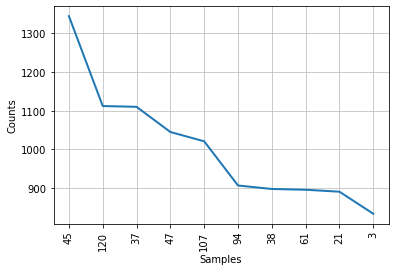

In [31]:
### Using nltk to check on the top 10 aisles 

import nltk

input2 = df_transformed['aisle_id']

entire_document_words = nltk.FreqDist(input2)
entire_document_words.plot(10,cumulative=False)

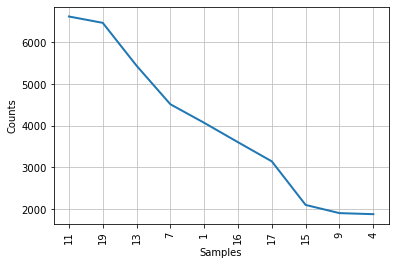

In [32]:
### Using nltk to check on the top 10 department

import nltk

input3 = df_transformed['department_id']

entire_document_words = nltk.FreqDist(input3)
entire_document_words.plot(10,cumulative=False)


In [33]:
### Thinking of making the plots here ###


In [46]:
##Setting up across all plots##
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 10, 10 
#An instance of RcParams for handling default matplotlib values with x, y

sns.set_style('whitegrid')
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

# df6 = pd.read_csv("/Users/dawnsaw/Desktop/Instacart Project/mergedorderfiles.csv", header=0)
df6.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2,202279,prior,3,5,9,8.0,33120,1,1
1,2,202279,prior,3,5,9,8.0,28985,2,1
2,2,202279,prior,3,5,9,8.0,9327,3,0
3,2,202279,prior,3,5,9,8.0,45918,4,1
4,2,202279,prior,3,5,9,8.0,30035,5,0


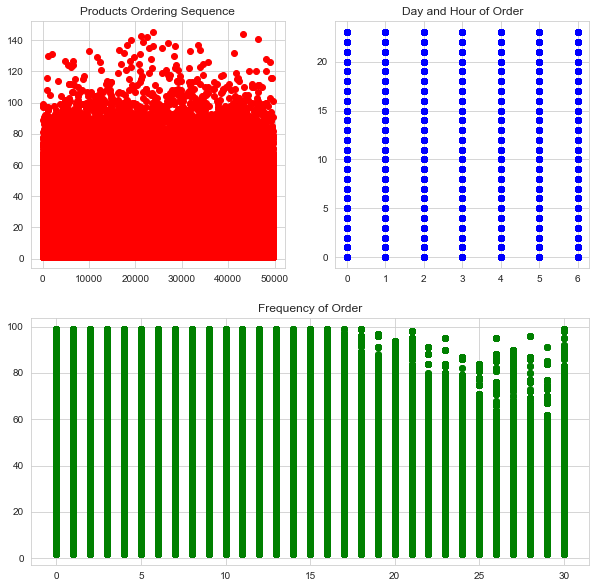

In [48]:
##subplot style##
# plt.figure(figsize=(17,17))   #optional

plt.subplot(2,2,1)
plt.scatter(df6.product_id, df6.add_to_cart_order, c='r')
plt.title('Products Ordering Sequence')

plt.subplot(2,2,2)
plt.scatter(df6.order_dow, df6.order_hour_of_day, c='b')
plt.title('Day and Hour of Order')


plt.subplot(2,1,2)
plt.scatter(df6.days_since_prior_order, df6.order_number, c='g')
plt.title('Frequency of Order')


plt.show()